<a href="https://colab.research.google.com/github/samuelhtampubolon/SDPM2025/blob/main/Logistic_Regression_with_Builtin_Breast_Cancer_Dataset_Using_ScikitLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
import numpy as np

In [13]:
# Load dataset
data = load_breast_cancer()
X = data.data[:, :2]  # Use first two features for visualization
y = data.target

In [14]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Train
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

In [17]:
# Prints
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Intercept:", model.intercept_)

Accuracy: 0.9122807017543859
Intercept: [18.84565222]


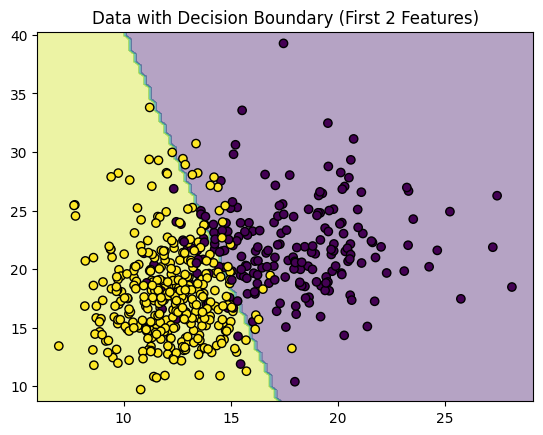

In [18]:
# Visual 1: Scatter with boundary
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k')
plt.title('Data with Decision Boundary (First 2 Features)')
plt.show()

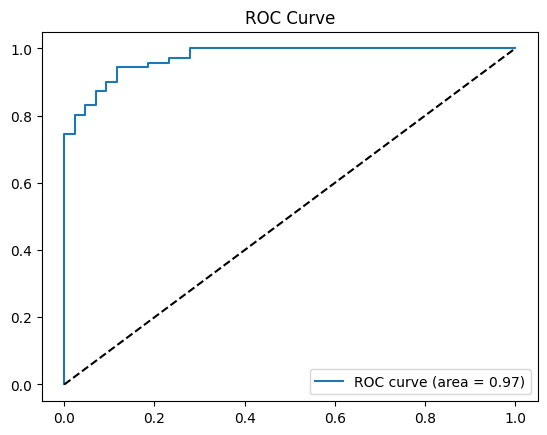

In [19]:
# Visual 2: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve')
plt.legend()
plt.show()